C:\Users\madhu\AppData\Local\Temp\ipykernel_13644\2289238295.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  watermark = watermark.resize(image.size, Image.ANTIALIAS)


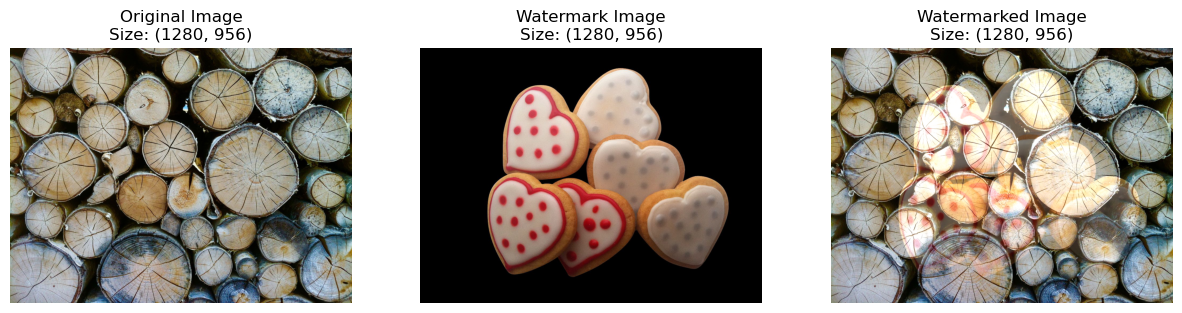

In [7]:
import pywt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def embed_watermark(image_path, watermark_path, output_path):
    # Load the original image and watermark
    image = Image.open(image_path)
    watermark = Image.open(watermark_path)
    
    # Ensure the image and watermark are in RGB mode
    image = image.convert('RGB')
    watermark = watermark.convert('RGB')

    # Resize the watermark to match the image size
    watermark = watermark.resize(image.size, Image.ANTIALIAS)

    # Convert the images to numpy arrays
    image_array = np.array(image)
    watermark_array = np.array(watermark)

    # Initialize an array for the watermarked image
    watermarked_array = np.zeros_like(image_array)

    # Perform DWT and watermark embedding for each channel (R, G, B)
    alpha = 0.5  # Watermark strength parameter
    for channel in range(3):  # 0: R, 1: G, 2: B
        # Perform DWT on the image channel
        coeffs = pywt.dwt2(image_array[:, :, channel], 'haar')
        LL, (LH, HL, HH) = coeffs

        # Perform DWT on the watermark channel
        coeffs1 = pywt.dwt2(watermark_array[:, :, channel], 'haar')
        LL1, (LH1, HL1, HH1) = coeffs1

        # Embed the watermark in the LL subband
        watermark_embedded = LL + alpha * LL1

        # Reconstruct the watermarked channel
        coeffs_embedded = (watermark_embedded, (LH, HL, HH))
        watermarked_channel = pywt.idwt2(coeffs_embedded, 'haar')

        # Clip values to the valid range and convert to uint8
        watermarked_channel = np.clip(watermarked_channel, 0, 255).astype(np.uint8)

        # Store the watermarked channel
        watermarked_array[:, :, channel] = watermarked_channel

    # Convert the watermarked image array back to an image
    watermarked_image = Image.fromarray(watermarked_array, 'RGB')

    # Save the watermarked image
    watermarked_image.save(output_path)

    # Display the images and their sizes
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title(f"Original Image\nSize: {image.size}")
    plt.axis('off')

    # Watermark Image
    plt.subplot(1, 3, 2)
    plt.imshow(watermark)
    plt.title(f"Watermark Image\nSize: {watermark.size}")
    plt.axis('off')

    # Watermarked Image
    plt.subplot(1, 3, 3)
    plt.imshow(watermarked_image)
    plt.title(f"Watermarked Image\nSize: {watermarked_image.size}")
    plt.axis('off')

    plt.show()

# Usage example
embed_watermark('original_img.jpg', 'watermarking_img1.jpg', 'watermarked_image.jpg')
